## 선형회귀(Linear Regression)

- 선형 회귀는 특성이 하나인 경우 그 특성을 가장 잘 나타낼 수 있는 직선을 학습하는 것이다.


최근접 이웃 회귀에서 예측했던 농어의 무게 예측을 선형 회귀로 재차 진행했다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./datasets/Fish.csv", encoding = "CP949")

In [3]:
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [4]:
perch_data = data[data['Species'] == 'Perch']

In [5]:
perch_length = perch_data['Length2']
perch_weight = perch_data['Weight']

In [6]:
perch_data = data[data['Species'] == 'Perch']

In [7]:
perch_length = perch_data['Length2']
perch_weight = perch_data['Weight']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(perch_length, perch_weight, random_state = 42)

In [9]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 1)
(14, 1)
(42,)
(14,)


In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
# 50cm인 농어 무게 예측
lr.predict([[50]])

array([1241.83860323])

최근접 이웃 회귀의 결과 1033g와 달리 선형 회귀는 1241g로 예측했다


선형 회귀는 $y = ax + b$의 식을 사용하며 이때, $a$는 기울기, $b$는 절편, $y$는 농어의 무게,  $x$는 농어의 길이를 의미한다.

In [12]:
# 모델의 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


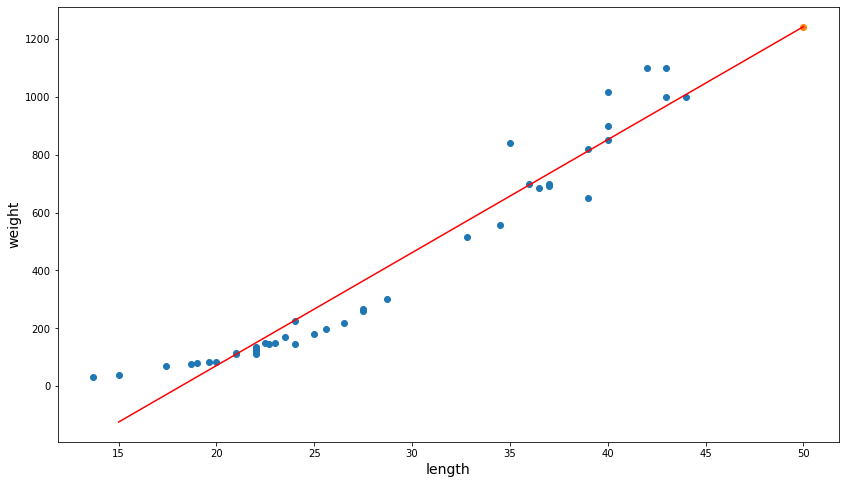

In [13]:
# 선형 회귀 직선
plt.figure(figsize = (14,8))
plt.scatter(x_train,y_train)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_],c = 'r')
plt.scatter(50,lr.predict([[50]]))
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.show()

In [14]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.939846333997604
0.8247503123313558


학습한 선형회귀는 train과 test의 점수차도 크고, 직선이나 데이터의 분포가 곡선임으로 잘 반영되었다고 보기 어렵다.

데이터의 곡선을 반영해주기 위해 **다항 회귀**를 진행했다.

## 다항 회귀 진행

- 다른 변수를 추가하기보단 농어의 길이를 제곱하여 새로운 열로 추가했다.

In [15]:
x_train = np.column_stack([x_train ** 2, x_train])
x_test = np.column_stack([x_test ** 2, x_test])

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
# 50cm인 농어 다항 회귀로 예측
lr.predict([[50**2,50]])

array([1573.98423528])

In [18]:
# 기울기와 절편
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


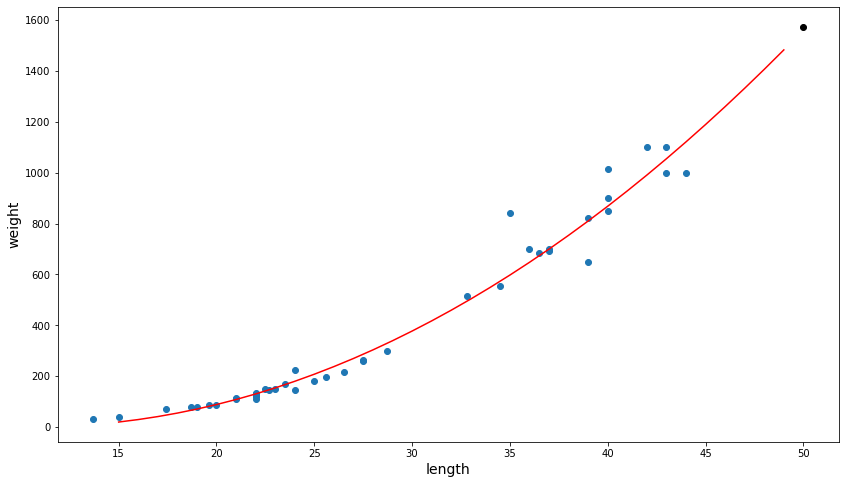

In [19]:
point = np.arange(15,50)
plt.figure(figsize = (14,8))
plt.scatter(x_train[:,1],y_train)
plt.plot(point,point**2*1.01-21.6*point+116.1, 'r')
plt.scatter(50,1574, c = 'black')
plt.xlabel('length', fontsize = 14)
plt.ylabel('weight', fontsize = 14)
plt.show()

In [20]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9706807451768623
0.9775935108325121


이전보다 점수는 높아졌지만 train보다 test의 점수가 높은 과소적합을 의심해 볼 수 있다. 좀 더 복잡한 모델을 만들어 볼 필요가 있음을 느꼈다.

## 다중 회귀

- 생선의 길이만 사용하는 것이 아닌 높이(Height)와 두께(Width)를 추가한 다중 회귀 모델을 만들어 무게 예측을 진행했다.

In [21]:
perch_train = perch_data[['Length2','Height','Width']]
perch_target = perch_data[['Weight']]

In [22]:
# 넘파이 배열로 변환
perch_train = perch_train.to_numpy()
perch_target = perch_target.to_numpy()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(perch_train,perch_target, random_state = 42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 3)
(14, 3)
(42, 1)
(14, 1)


### 다항회귀와 다중회귀의 차이


- 다중회귀: 다수의 독립변수가 있는 형태, 다중공선성 문제를 중요하게 봐야함.<br>
$y = b_0 + b_1x_1 + b_2x_2 +...+b_nx_n$
<br><Br>
- 다항회귀: 독립변수의 차수를 높이는 형태<br>
$y = w_0 + w_1x + w_2x^2 +...+w_dx^d$

In [25]:
# 다항회귀 변환
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


- 2,3의 특성을 가진 샘플의 특성이 6개로 변환

2와 3의 제곱 4,9 추가, 2*3인 6 특성 추가, 1은 절편이므로 결국 길이,높이, 두께,1이 특성이 된다. 그러나 선형 모델은 자동으로 절편을 추가하기에 굳이 절편을 특성으로 만들 필요가 없다. (include_bias = FALSE)옵션을 추가하면 절편 항 생성을 무시한다

In [26]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
print("생성된 특성 개수 :",train_poly.shape)

생성된 특성 개수 : (42, 9)


In [27]:
# 생성된 특성 9개
# x0 : 첫번째 특성, x0^2: 첫번째 특성의 제곱, x0x1: 첫 번째 두 번째 특성의 곱
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [28]:
test_poly = poly.transform(x_test)

In [29]:
### 다중회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,y_train)

LinearRegression()

In [30]:
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9903557670312702
0.9712376207461861


test는 차이가 없지만 train은 다중 회귀보다 높은 설명력을 보였다. 과소적합 문제도 이전보단 덜 하다.

제곱 항을 좀 더 추가해서 결과를 확인해본다.

In [31]:
# 3제곱항 다항회귀, 최대 5제곱까지 가능 
for i in range(3,6) :
    poly = PolynomialFeatures(degree = i, include_bias = False)
    poly.fit(x_train)
    train_poly = poly.transform(x_train)
    test_poly = poly.transform(x_test)
    print("----------------")
    print("생성된 특성 개수:",train_poly.shape)
    lr.fit(train_poly, y_train)
    print("train 데이터 설명력 :",lr.score(train_poly, y_train))
    print("test 데이터 설명력:",lr.score(test_poly,y_test))
    print("----------------")

----------------
생성된 특성 개수: (42, 19)
train 데이터 설명력 : 0.9963988305355984
test 데이터 설명력: 0.9424955718448528
----------------
----------------
생성된 특성 개수: (42, 34)
train 데이터 설명력 : 0.9995466835085437
test 데이터 설명력: -6.92630084052
----------------
----------------
생성된 특성 개수: (42, 55)
train 데이터 설명력 : 0.9999999999986519
test 데이터 설명력: -129.8791540807646
----------------


제곱항을 늘리면 늘릴수록 test 셋의 점수는 음수까지 낮아졌다. <br>
**샘플보다 특성의 개수가 더 많아서 그럴 것: train 데이터에 과대 적합되어 test 데이터에 일반화가 불가피함**<Br>

회귀 모형에 규제를 실시

## 규제

- 머신러닝 모델이 train 세트를 너무 과도하게 학습하지 못하도록 규제를 걸 수 있다.(모델이 train에 과대적합되지 않도록 만든다.)


#### 규제를 넣은 회귀 모델
***
1. 릿지

2. 랏쏘

3. 엘라스틱넷

규제는 비용함수에 계산되는 값이기 때문에 입력 특성의 스케일이 다르면 제어값도 달라진다. 따라서 규제를 적용할 때는 정규화를 진행하고 적용한다. 

In [32]:
# 정규화 진행 (mean, std 사용)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(train_poly)
train_scaled = standard.transform(train_poly)
test_scaled = standard.transform(test_poly)

## 릿지 회귀

- 비용함수에 $a \sum_{i=1}^n\theta_{i=1}^2$를 추가한다.

<center>릿지 회귀의 비용함수
$$J(\theta) = MSE(\theta) + a \sum_{i=1}^n\theta_{i=1}^2$$
    

<center>$\alpha$ 가 0일 경우 이전의 선형 회귀와 같은 모델이 된다.<br>
    L2-norm = 최소제곱오차(LSE): 목표값과 추정값 사이의 차의 제곱의 합을 최소화.

In [33]:
# 표준화 시킨 데이터에 릿지 회귀 적용
print(train_scaled.shape, test_scaled.shape)

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print("train 릿지 회귀 설명력:",ridge.score(train_scaled,y_train))
print("test 릿지 회귀 설명력:",ridge.score(test_scaled,y_test))

(42, 55) (14, 55)
train 릿지 회귀 설명력: 0.9896217956447124
test 릿지 회귀 설명력: 0.9788853860988022


특성 수를 55개임에도 불구하고 test 점수가 정상 범위로 돌아왔다. 

릿지와 라쏘는 규제의 양을 임의로 조절이 가능하며(하이퍼파라미터는 alpha) **alpha값이 크면** 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.

**alpha 값이 작으면** 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지기때문에 과대적합될 가능성이 올라간다.

In [34]:
# alpha(규제) 값에 따른 회귀 성능 변화
params = [0.001,0.01,0.1,1,10,100]
train_score = []
test_score = []

for i in params :
    ridge = Ridge(alpha = i)
    ridge.fit(train_scaled,y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled,y_test))

In [35]:
test_score

[0.9560293715515176,
 0.9796497117192821,
 0.9826465162736724,
 0.9788853860988022,
 0.9722857046398282,
 0.9624191421271444]

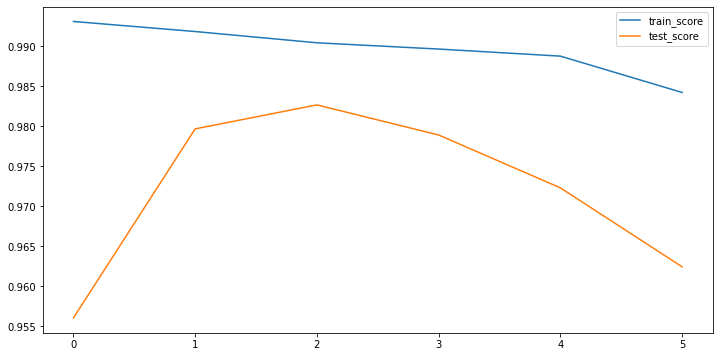

In [36]:
plt.figure(figsize = (12,6))
plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

alpha가 너무 낮은 경우 train 점수는 높으나 test 점수가 낮게 나오는 과대적합을 보이며<br>
alpha가 너무 큰 경우 train 점수와 test 점수가 동시에 낮아지는 과소적합을 보인다.

**결론** : 0.01일 때의 간격이 가장 작기 때문에 alpha의 계수는 0.1로 채택

## 라쏘 회귀

<center>릿지 회귀의 비용함수
$$J(\theta) = MSE(\theta) + a \sum_{i=1}^n|\theta_{i}|$$
    

<center>$\alpha$ 가 0일 경우 이전의 선형 회귀와 같은 모델이 된다.<br>
    L1-norm = 최소절대오차(LAE): 목표값과 추정값 사이의 차의 절댓값의 합을 최소화.

In [37]:
# 릿지와 마찬가지로 alpha를 통해 규제 진행
params = [0.001,0.01,0.1,1,10,100]
train_score = []
test_score = []
minus = []

from sklearn.linear_model import Lasso
for i in params :
    lasso = Lasso(alpha = i)
    lasso.fit(train_scaled,y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled,y_test))
    minus.append(lasso.score(train_scaled, y_train) - lasso.score(test_scaled,y_test))

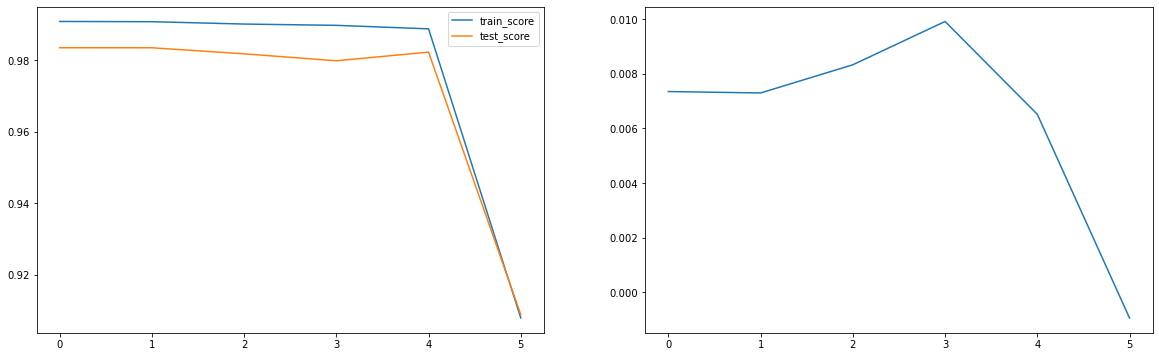

In [38]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.subplot(1,2,2)
plt.plot(minus)
plt.show()

왼쪽 그래프를 보면 alpha가 작을수록 과대적합, 오른쪽으로 갈수록 간격이 좁혀진다 그러나 가장 오른쪽은 점수가 급격하게 낮아지므로 과소적합을 의심해볼 수 있다.

간격이 가장 좁고 점수도 잘 보존하는 alpha = 10을 최적 alpha값으로 지정했다.

In [39]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled,y_train)
train_score.append(lasso.score(train_scaled, y_train))
test_score.append(lasso.score(test_scaled,y_test))

규제 회귀는 계수 크기를 줄이는데 목적으로 두지만 라쏘는 계수 값을 아예 0으로 만들 수 있다.

In [40]:
# 회귀 계수를 0으로 만든 특성 개수
np.sum(lasso.coef_ == 0)

40

라쏘 회귀는 특성 15개만 활용하여 결과를 만들었다.

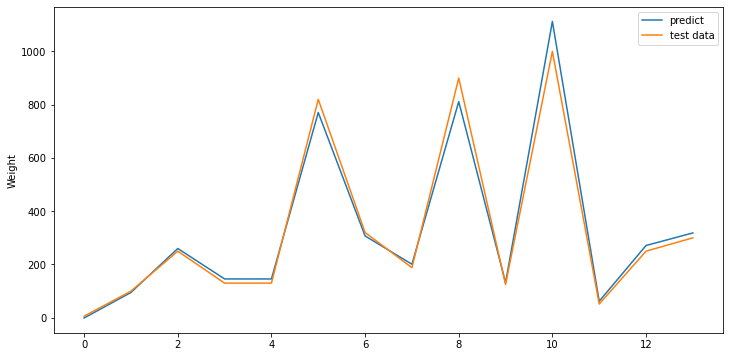

In [41]:
plt.figure(figsize = (12,6))
y_pred = lasso.predict(test_scaled)
plt.plot(y_pred, label = 'predict')
plt.plot(y_test, label = 'test data')
plt.ylabel("Weight")
plt.legend()
plt.show()

농어 무게를 test data와 근사하게 예측했다